In [2]:
import matplotlib.pyplot as plt
# import pickle as pkl
import numpy as np
import os
import joblib
from scipy.spatial.transform import Rotation as sRot

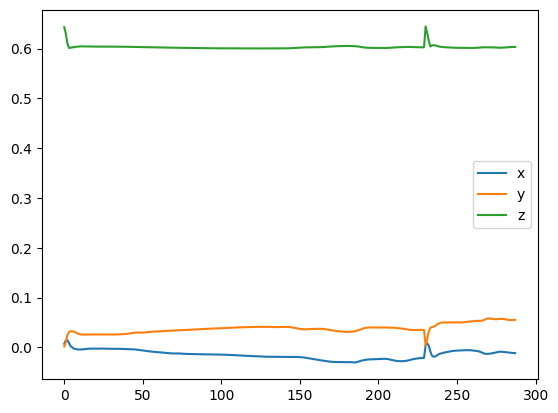

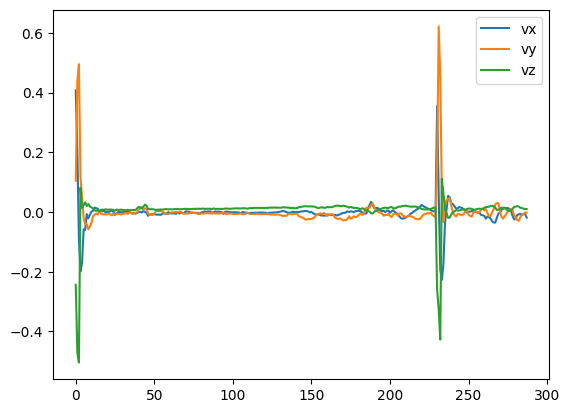

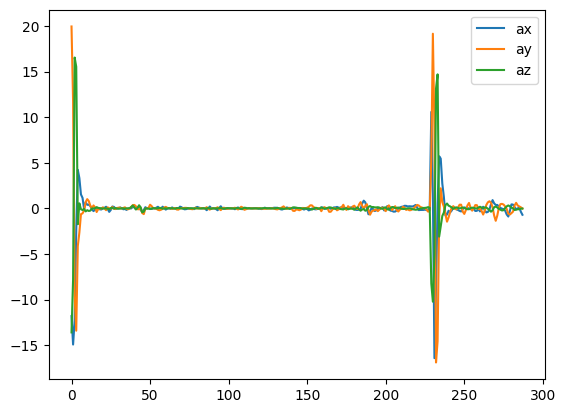

In [4]:
# pkl.load("./stair_im/phc_act/rimotion_take6/noise_False_0.05_2025-11-19-13:32:15.pkl")
idx_agent = 3
# data = joblib.load("./stair_im/phc_act/rimotion_take6/noise_False_0.05_2025-11-19-13:32:15.pkl")
data = joblib.load("./sitting_im/phc_act/rimotion_sitting_take6/noise_False_0.05_2025-11-27-01:42:43.pkl")
state = data['rigid_body_state']  # n, b, 13
state_pelvis = state[:, idx_agent, 0, :]

# position
plt.figure()
plt.plot(state_pelvis[:, 0:3], label=['x','y','z'])
plt.legend()
# velocity
plt.figure()
plt.plot(state_pelvis[:, 7:10], label=['vx','vy','vz'])
plt.legend()
# compute acceleration from velocity by finite difference
vel = state_pelvis[:, 7:10]
acc = np.zeros_like(vel)
acc[1:-1] = (vel[2:] - vel[:-2]) / 2.0
acc[0] = vel[1] - vel[0]
acc[-1] = vel[-1] - vel[-2] # simple finite difference
# multiply by frame rate (assuming 60Hz)
acc *= 60.0
plt.figure()
plt.plot(acc, label=['ax','ay','az'])
plt.legend()

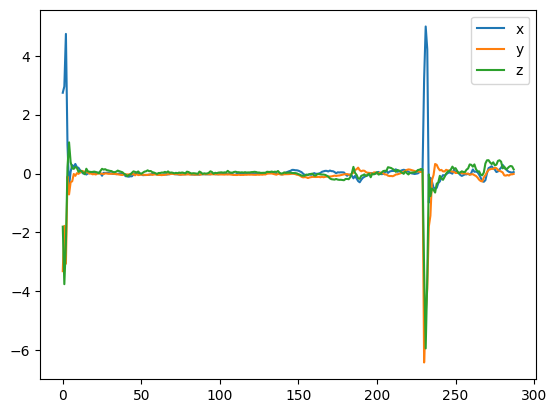

In [ ]:
plt.plot(state_pelvis[:, 10:13], label=['x','y','z'])
plt.legend()
# plt.plot(state_pelvis[:, 10:13], label='x')

In [5]:
R = sRot.from_quat(state_pelvis[:, 3:7]).as_matrix()
omega = state_pelvis[:, 10:13]

In [6]:
rotated = np.einsum('nij,nj->ni', R, omega)           # -> (N, 3)

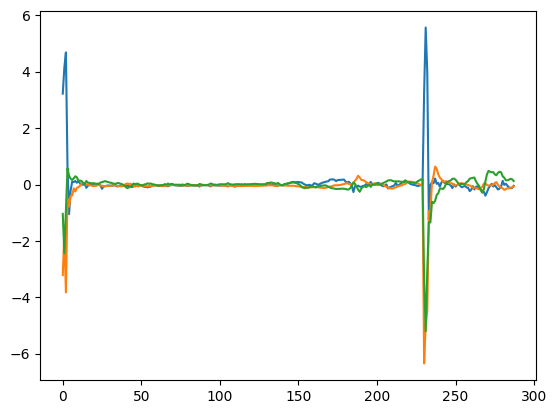

In [7]:
plt.plot(rotated, label=['x_rot','y_rot','z_rot'])